In [2]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? ㅛ
Your response ('ㅛ') was not one of the expected responses: y, n
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-1.15.0


In [3]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 33kB/s 
     |████████████████████████████████| 3.8MB 49.8MB/s 
     |████████████████████████████████| 450kB 54.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available())

2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import cifar10

In [4]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
input_layer = tf.keras.layers.Input(shape=(32,32,3))

conv_layer_1 = tf.keras.layers.Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = tf.keras.layers.Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = tf.keras.layers.Flatten()(conv_layer_2)

output_layer = tf.keras.layers.Dense(units=10, activation = 'softmax')(flatten_layer)

model = tf.keras.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
input_layer = tf.keras.layers.Input((32,32,3))

x = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)


x = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)


x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = tf.keras.layers.Dropout(rate = 0.5)(x)

x = tf.keras.layers.Dense(NUM_CLASSES)(x)
output_layer = tf.keras.layers.Activation('softmax')(x)

model = tf.keras.Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0   

모델 훈련

In [0]:
opt = tf.keras.optimizers.Adam(0.0005)
model.compile(optimizer=opt, loss= 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,shuffle=True,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 364us/sample - loss: 1.5633 - accuracy: 0.4545 - val_loss: 1.2109 - val_accuracy: 0.5726
Epoch 2/10
50000/50000 [==============================] - 10s 207us/sample - loss: 1.1548 - accuracy: 0.5944 - val_loss: 1.1593 - val_accuracy: 0.5880
Epoch 3/10
50000/50000 [==============================] - 10s 208us/sample - loss: 1.0122 - accuracy: 0.6467 - val_loss: 1.0278 - val_accuracy: 0.6406
Epoch 4/10
50000/50000 [==============================] - 10s 208us/sample - loss: 0.9295 - accuracy: 0.6758 - val_loss: 0.9082 - val_accuracy: 0.6884
Epoch 5/10
50000/50000 [==============================] - 10s 205us/sample - loss: 0.8665 - accuracy: 0.6977 - val_loss: 0.8946 - val_accuracy: 0.6886
Epoch 6/10
50000/50000 [==============================] - 10s 204us/sample - loss: 0.8105 - accuracy: 0.7164 - val_loss: 0.9618 - val_accuracy: 0.6638
Epoch 7/10
50000/50000 [====================

In [12]:
model.evaluate(x_test,y_test,batch_size=100)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.7880 - accuracy: 0.7293


[0.7880292403697967, 0.7293]

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

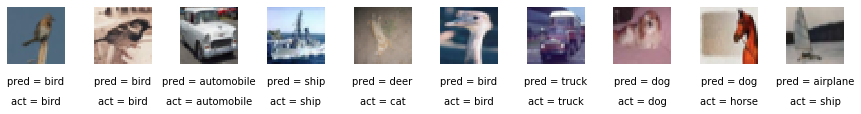

In [15]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)